# Trending_Youtube_Statistics

Name: Chih-Wei (Jerry) Huang
Date: 10/15/2021

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


### US Data

In [2]:
#import US data from the CSV
us_yt = pd.read_csv('data/USvideos.csv')
display(us_yt.info)
display(us_yt.head())

<bound method DataFrame.info of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualis

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# drop unnecessary columns
us_yt.drop(['video_id','trending_date','category_id','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled', 'description'],axis=1,inplace=True)

#sort by top views
us_yt.sort_values(["views"], axis=0,ascending=[False], inplace=True)
display(us_yt.head())

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232
38345,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337
38146,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799
37935,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722
37730,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211


In [4]:
#eliminate duplicate rows and keep the one with highest views(the latest)
us_yt = us_yt.drop_duplicates(subset='title', keep='first')
display(us_yt.head())
display(us_yt.info)

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698
34708,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655


<bound method DataFrame.info of                                                    title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
6181   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
34708               Ariana Grande - No Tears Left To Cry     ArianaGrandeVevo   
34888  Becky G, Natti Natasha - Sin Pijama (Official ...           BeckyGVEVO   
38273                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
...                                                  ...                  ...   
160               Huffy Metaloid Bicycle Commercial 1997      90s Commercials   
12716     Raw: 3 South Carolina Deputies, 1 Officer Shot     Associated Press   
14984                                      Artwork Forge     Palo Alto Online   
777        Coach Taggart Monday Presser Ahead of Arizona        GoDucksdotcom   
14782   1 dead, others injured after Ky. school shooting                Newsy

In [5]:
# finding the correlation matrix
us_yt.corr()

,views,likes,dislikes,comment_count
views,1.000000,0.834386,0.441927,0.573957
likes,0.834386,1.000000,0.420739,0.765372
dislikes,0.441927,0.420739,1.000000,0.734968
comment_count,0.573957,0.765372,0.734968,1.000000


Finding: Strong positive correlation with likes and views, strong positive correlation with likes and comments, while there is a moderate correlation between views and comments.

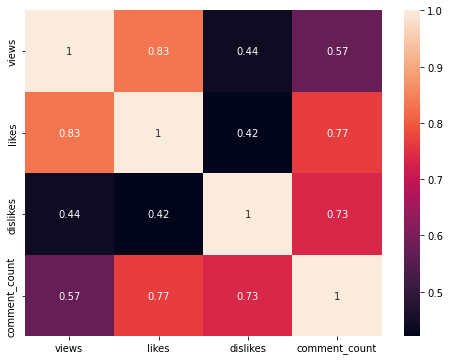

In [6]:
# Visualize the correlations, see the plots below
plt.figure(figsize=(8,6))
sns.heatmap(us_yt.corr(), annot=True);

D:\anaconda3\envs\p4e\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


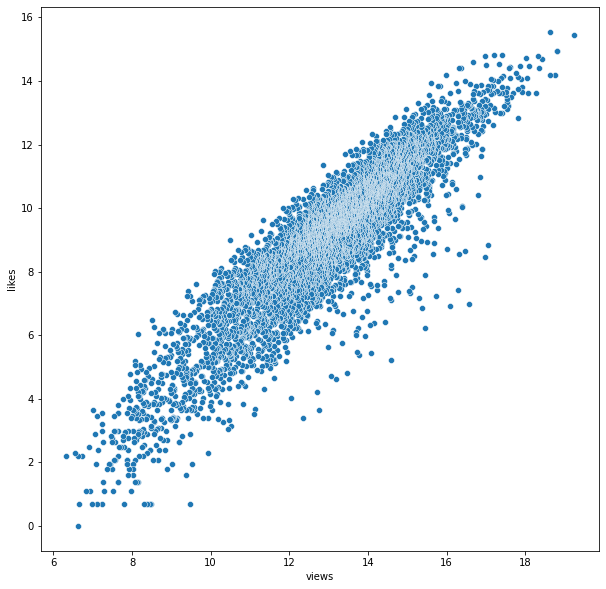

In [7]:
#scatterplot for likes/views
plt.figure(figsize=(10,10))
sns.scatterplot(x=np.log(us_yt['views']), y=np.log(us_yt['likes']));

In [8]:
# add likes / views ratio & likes / dislikes ratio column
us_yt['l/v ratio'] = ( us_yt['likes'] / (us_yt['views']) )

us_yt['l/d ratio'] = (us_yt['likes'] / (us_yt['likes'] + us_yt['dislikes']) )

display(us_yt.head(10))

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,l/v ratio,l/d ratio
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,0.022305,0.935990
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,0.020710,0.653114
34708,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,0.020809,0.959826
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,0.010231,0.922476
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,0.045637,0.964456
34747,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,2018-04-12T16:00:04.000Z,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",122544931,1427436,40837,55320,0.011648,0.972187
2587,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,2017-11-17T05:00:01.000Z,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",102012605,2376636,117196,134224,0.023297,0.953006
40869,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,2018-05-29T14:05:10.000Z,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",94254507,1816753,102474,101077,0.019275,0.946607
4997,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",91933007,2625661,53709,350458,0.028561,0.979955
25947,Maluma - El Préstamo (Official Video),MalumaVEVO,2018-03-09T11:00:01.000Z,"Maluma Music|""Maluma Official Video""|""Maluma V...",87264467,815369,71494,35945,0.009344,0.919386


### Use Pipeline to Predict Video Likes

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
us_yt['tag_list'] = us_yt.tags.str.split('|')

us_yt_tags_long = []
for index, row in us_yt[['title', 'tag_list']].iterrows():
    title = row['title']
    tags = row['tag_list']
    for tag in tags:
        us_yt_tags_long.append({'title':title,'tag':tag})
us_yt_tags_long = pd.DataFrame(us_yt_tags_long)

<AxesSubplot:ylabel='tag'>

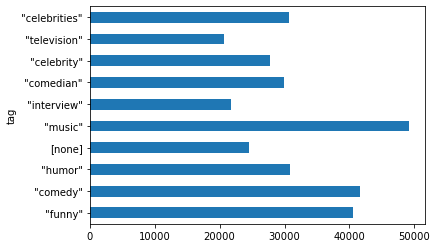

In [11]:
tag_summary = (
    us_yt_tags_long
    .assign(tag=lambda x: x.tag.str.lower())
    .set_index('title')
    .join(us_yt.set_index('title'))
    .reset_index()
    .groupby('tag')
    .agg({'title':'nunique', 'likes':'mean', 'views':'mean'})
    .sort_values('title', ascending=False)
)

tag_summary.head(10).likes.plot(kind='barh')

In [12]:
features = ['views', 'comment_count']

X = us_yt
y = us_yt['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [13]:
class BasePipeStep(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        return X

    
class SelectColumns(BasePipeStep):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X):
        X = X.copy()
        return X[self.columns]

    
class PopularTagFeature(BasePipeStep): 
    def fit(self,X, y=None):
        us_yt_tags_long = []
        for index, row in X[['title', 'tags']].iterrows():
            title = row['title']
            tags = row['tags']
            for tag in tags:
                us_yt_tags_long.append({'title':title,'tag':tag})
        us_yt_tags_long = pd.DataFrame(us_yt_tags_long)
        self.tag_summary = (
            us_yt_tags_long
            .assign(tag=lambda x: x.tag.str.lower())
            .set_index('title')
            .join(X.set_index('title'))
            .reset_index()
            .groupby('tag')
            .agg({'title':'nunique', 'likes':'mean', 'views':'mean'})
            .sort_values('likes', ascending=False)
            .head(30)
            .index
            .values
        )
        return self
    
    def transform(self, X):
        X = X.copy()
        X['high_tag']  = 0

        for tag in self.tag_summary:
            X['high_tag']  += np.where(X.tags.str.contains(tag),1,0)
        return X
        

preprocessing = Pipeline([
    ('popular_tags', PopularTagFeature()),
    ('select_columns', SelectColumns([
        'views','comment_count',
        'high_tag',
    ]))
    
])

pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('learning', xgb.XGBRegressor() )
])

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('popular_tags', PopularTagFeature()),
                                 ('select_columns',
                                  SelectColumns(columns=['views',
                                                         'comment_count',
                                                         'high_tag']))])),
                ('learning',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tr

Mean squared error: 73,343.128
R2 score: 0.8594410624910626


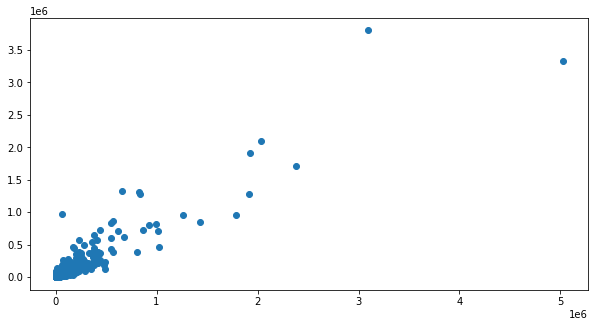

In [15]:
predictions = pipe.predict(X_test)
error = mean_squared_error(y_test, predictions, squared=False)
prediction_r2_score = r2_score(y_test, predictions)
print(f'Mean squared error: {error:,.3f}')
print(f'R2 score: {prediction_r2_score}')
f, ax = plt.subplots(figsize=(10,5))
ax.scatter(y_test, predictions)

### World Data

In [ ]:
col_list = ['title','video_id', 'views', 'likes', 'dislikes', 'comment_count'] #only use these columns for analysis

#us_yt = pd.read_csv('data/USvideos.csv', usecols=col_list) #United States
ca_yt = pd.read_csv('data/CAvideos.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('data/DEvideos.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('data/FRvideos.csv', usecols=col_list) #France
gb_yt = pd.read_csv('data/GBvideos.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('data/INvideos.csv', usecols=col_list) #India
#jp_yt = pd.read_csv('data/JPvideos.csv', usecols=col_list) #Japan
#kr_yt = pd.read_csv('data/KRvideos.csv', usecols=col_list) #South Korea
#mx_yt = pd.read_csv('data/MXvideos.csv', usecols=col_list) #Mexico
#ru_yt = pd.read_csv('data/RUvideos.csv', usecols=col_list) #Russia

UnicodeDecodeError appears when reading Japan, Korea, Mexico, and Russia.
UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 215323-215324: invalid continuation byte.
Might be the language problem?

In [ ]:
#eliminate repeated videos
wd_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt,]
wd_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',]

for i in range(len(wd_list)):
    wd_list[i].sort_values(['views'], axis=0,ascending=[False], inplace=True)
    wd_list[i] = wd_list[i].drop_duplicates(subset='title', keep='first')

In [ ]:
views_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count'])

display(views_df, likes_df)

In [ ]:
#create correlation tables

for i in range(len(wd_list)):
    print(wd_name_list[i])
    current_wd = wd_list[i]
    corr_table = current_wd.corr()
    views_df.loc[i] = corr_table.loc['views']
    likes_df.loc[i] = corr_table.loc['likes']
    display(corr_table)   

In [ ]:
Master_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count', 'country'])
display(Master_df)

In [ ]:
#create a master dataframe with all the datapoints in it
count = 0
entries = 0
while count != 6:
    current_df = wd_list[count]
    entries = entries + len(current_df)
    country_name = wd_name_list[count]
    current_df['country'] = country_name
    Master_df = pd.merge(Master_df, current_df, how='outer')
    count += 1
print(entries)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])
sns.despine(bottom=True, left=True);